## Machine learning (Árvores de decisão)

### Passo 1: Importar o conjunto de dados

In [1]:
import pandas as pd

names = ["AGE", "SEX", "CP", "TRESTBPS", "CHOL", "FBS", "RESTECG", 
         "THALACH", "EXANG", "OLDPEAK", "SLOPE", "CA", "THAL", "TARGET"]

dataset = pd.read_csv("heart.dat", sep =" ", names = names)

print("############################### DATASET #################################")
print(dataset.head())

print("")
print("############################### ASPECTOS GERAIS #############################")
print(dataset.info())

############################### DATASET #################################
    AGE  SEX   CP  TRESTBPS   CHOL  FBS  RESTECG  THALACH  EXANG  OLDPEAK  \
0  70.0  1.0  4.0     130.0  322.0  0.0      2.0    109.0    0.0      2.4   
1  67.0  0.0  3.0     115.0  564.0  0.0      2.0    160.0    0.0      1.6   
2  57.0  1.0  2.0     124.0  261.0  0.0      0.0    141.0    0.0      0.3   
3  64.0  1.0  4.0     128.0  263.0  0.0      0.0    105.0    1.0      0.2   
4  74.0  0.0  2.0     120.0  269.0  0.0      2.0    121.0    1.0      0.2   

   SLOPE   CA  THAL  TARGET  
0    2.0  3.0   3.0       2  
1    2.0  0.0   7.0       1  
2    1.0  0.0   7.0       2  
3    2.0  1.0   7.0       1  
4    1.0  1.0   3.0       1  

############################### ASPECTOS GERAIS #############################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AGE       270 no

### Passo 2.1: Pré-processamento de dados: Valores missing em cada coluna

In [2]:
def NullValues(dataset, names):
    
    null_count = []
    dict_null = {}
    
    for i, columns in enumerate(names):
        
        null = dataset[columns][dataset[columns] == "?"].count()
        null_count.append(null)
        dict_null[columns] = null
        
    return dict_null

print(NullValues(dataset, names))

{'AGE': 0, 'SEX': 0, 'CP': 0, 'TRESTBPS': 0, 'CHOL': 0, 'FBS': 0, 'RESTECG': 0, 'THALACH': 0, 'EXANG': 0, 'OLDPEAK': 0, 'SLOPE': 0, 'CA': 0, 'THAL': 0, 'TARGET': 0}


/home/arley/snap/jupyter/common/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/arley/snap/jupyter/common/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/arley/snap/jupyter/common/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/arley/snap/jupyter/common/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/arley/

### Passo 2.2: Checando balanceamento de classes na variável target

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


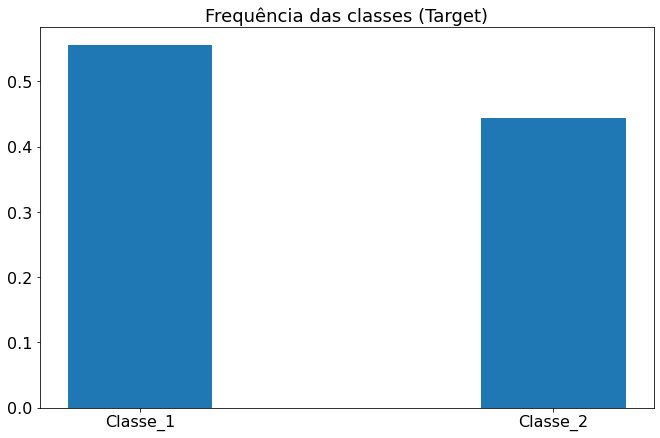

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

quant = len(dataset['TARGET'])
classe_1 = (dataset['TARGET'][dataset["TARGET"] == 1].count())
classe_2 = (len(dataset['TARGET']) - classe_1)


#---------------------- Parâmetros para construir o gráfico ------------------------#
Y = [classe_1/quant, classe_2/quant]
X = [1,2]
labels = ["Classe_1", "Classe_2"]
width = 0.35 

#---------------------------- Construção do gráfico --------------------------------#
fig, axe = plt.subplots(1, 1, figsize = (11, 7))
axe.bar(X, Y, width)

#---------------------------- Ajuste do gráfico ------------------------------------#
axe.set_title("Frequência das classes (Target)", fontsize = 18)
axe.set_xticks(X)
yticks = np.around(np.arange(0, max(Y), 0.10), 1)
axe.set_yticklabels(yticks, fontsize = 16)
axe.set_xticklabels(labels, fontsize = 16)
plt.show()

### Passo 3: Ajuste do modelo de classificação

In [4]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


#-------------------------------- Dados de treino e de teste ------------------------------------#
target = dataset["TARGET"]
dataset3 = dataset.drop(columns=["TARGET"])

X_train, X_test, Y_train, Y_test = train_test_split(dataset3, target, 
                                                    test_size= 0.3, random_state= 111)


#---------------------------- Ajuste do modelo utilizando gridsearch ----------------------------#

modelo = DecisionTreeClassifier()

hiperparametros = {'max_depth': [1, 2, 3, 5, 7, 9, 12], "max_features": [1, 2, 3, 5, 7, 9], 
                   "criterion": ["gini", "entropy"], "min_samples_leaf": [1, 2, 3, 5, 7, 9],
                   "min_samples_split": [2, 3 ,5 ,7, 9]}


grid_search = GridSearchCV(estimator = modelo, param_grid = hiperparametros).fit(X_train, Y_train)

#print(grid_search.cv_results_['mean_test_score'])

print("################################# Melhores hiperparâmetros #############################")
print(grid_search.best_estimator_)


#-------------------- Predições com dados de treino -----------------------------#
previsoes_train = grid_search.predict(X_train)

#-------------------- Predições com dados de teste -----------------------------#
previsoes_test = grid_search.predict(X_test)

#---------------------- Acurácia nos dados de treino ----------------------------#
acuracia_train = accuracy_score(Y_train, previsoes_train)

#---------------------- Acurácia nos dados de teste ----------------------------#
acuracia_test = accuracy_score(Y_test, previsoes_test)

#---------------------- Matriz de confusão nos dados de treino ----------------------------#
matriz_train = confusion_matrix(Y_train, previsoes_train)

#---------------------- Matriz de confusão nos dados de teste ----------------------------#
matriz_test = confusion_matrix(Y_test, previsoes_test)


print("")
print("Acurácia para os dados de treino: ", round(acuracia_train*100, 2), "%")
print("###################### Matriz de confusão para os dados de treino #########################")
print(matriz_train)

print("")
print("Acurácia para os dados de teste: ", round(acuracia_test*100, 2), "%")
print("###################### Matriz de confusão para os dados de teste #########################")
print(matriz_test)


/home/arley/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


################################# Melhores hiperparâmetros #############################
DecisionTreeClassifier(max_depth=7, max_features=7, min_samples_leaf=7,
                       min_samples_split=7)

Acurácia para os dados de treino:  83.6 %
###################### Matriz de confusão para os dados de treino #########################
[[83 17]
 [14 75]]

Acurácia para os dados de teste:  86.42 %
###################### Matriz de confusão para os dados de teste #########################
[[46  4]
 [ 7 24]]
